In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [7]:
data = pd.read_csv('/content/sample_data/tmdb_5000_movies.csv')
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
# Getting more info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
# Exploring some columns, in this the genre column - we'll be using this column
# to build our mode
data.iloc[0,1]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [10]:
# An example of 1 'keyword' row
data['keywords'].iloc[1]

'[{"id": 270, "name": "ocean"}, {"id": 726, "name": "drug abuse"}, {"id": 911, "name": "exotic island"}, {"id": 1319, "name": "east india trading company"}, {"id": 2038, "name": "love of one\'s life"}, {"id": 2052, "name": "traitor"}, {"id": 2580, "name": "shipwreck"}, {"id": 2660, "name": "strong woman"}, {"id": 3799, "name": "ship"}, {"id": 5740, "name": "alliance"}, {"id": 5941, "name": "calypso"}, {"id": 6155, "name": "afterlife"}, {"id": 6211, "name": "fighter"}, {"id": 12988, "name": "pirate"}, {"id": 157186, "name": "swashbuckler"}, {"id": 179430, "name": "aftercreditsstinger"}]'

In [11]:
# first row of data

In [12]:
x = data.iloc[0]

In [13]:
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [14]:
# Converting the json value of genres in more readable python
genres = json.loads(x['genres'])
genres

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [15]:
# Converting all the genres from above into 1 string. Genres with 2 words - 
# e.g. 'Science Fiction will be concantenated into 1 word.
genre_string = ' '.join(''.join(genre['name'].split()) for genre in genres)
genre_string


'Action Adventure Fantasy ScienceFiction'

In [16]:
# We write a function to perform the same with other similar json columns
def json_string(list_of_jsons):
    # converting the data type of list_of_json from object type to a list
    list_of_json = json.loads(list_of_jsons)
    json_oneString = ' '.join(''.join(genre['name'].title().split()) for genre \
                            in list_of_json) 
    return json_oneString

In [17]:
x[['keywords', 'genres']]

keywords    [{"id": 1463, "name": "culture clash"}, {"id":...
genres      [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: 0, dtype: object

In [18]:
# cleaning up the genres & keywords
def genres_keywords_to_string(row):
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(j['name'].split()) for j in genres)

    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(j['name'].split()) for j in keywords)
    return "%s %s" % (genres, keywords)

In [19]:
# testing with 1 row of data
genres_keywords_to_string(x)

'Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d'

In [20]:
# Creating a new string representation (by genres & keywords) of each movie
data['string'] = data.apply(genres_keywords_to_string, axis=1)
data['string'].head(5)

0    Action Adventure Fantasy ScienceFiction cultur...
1    Adventure Fantasy Action ocean drugabuse exoti...
2    Action Adventure Crime spy basedonnovel secret...
3    Action Crime Drama Thriller dccomics crimefigh...
4    Action Adventure ScienceFiction basedonnovel m...
Name: string, dtype: object

In [21]:
# creating a tf-idf vectorizer with a maximum of 2000 columns to keep out 
# less frequent terms

tfidf = TfidfVectorizer(max_features=2000)

In [22]:
# Creating a matrix from the string representation column above
# It keeps the most frequent terms in the corpus
X = tfidf.fit_transform(data['string'])

It's not yet obvious which row of the matrix corresponds with which movie, therefore we generate a mapping to the movie title. 
We want to be able to find the location of the movie in our matrix.
Therefore, the index will be the title of the movie and the location (index) will be the value in the pandas series data structure

In [23]:
# Mapping the movies (titles) to locations where they're stored
movie2idx = pd.Series(data.index, data['title'])
movie2idx.head(20)

title
Avatar                                          0
Pirates of the Caribbean: At World's End        1
Spectre                                         2
The Dark Knight Rises                           3
John Carter                                     4
Spider-Man 3                                    5
Tangled                                         6
Avengers: Age of Ultron                         7
Harry Potter and the Half-Blood Prince          8
Batman v Superman: Dawn of Justice              9
Superman Returns                               10
Quantum of Solace                              11
Pirates of the Caribbean: Dead Man's Chest     12
The Lone Ranger                                13
Man of Steel                                   14
The Chronicles of Narnia: Prince Caspian       15
The Avengers                                   16
Pirates of the Caribbean: On Stranger Tides    17
Men in Black 3                                 18
The Hobbit: The Battle of the Five Armies   

In [24]:
# An example of how our movie mappings will be used (also to make recommendation)
# So a user will type in the title of the movie... and will then receive the 
# index where this movie was stored. This index is then used to grab the correct
# row of our tfidf sparse matrix created earlier
idx = movie2idx['Harry Potter and the Half-Blood Prince']
idx

8

In [25]:
# Vieuwing a single row of the above tfidf sparse matrix
query = X[idx]
query

<1x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [26]:
# viewing the actual values of this row
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [27]:
# Computing the cosine similarity between the query & every vector in X
# Basically showing the similarty of the movies
scores = cosine_similarity(query, X)
scores

array([[0.03719578, 0.03902146, 0.03101056, ..., 0.        , 0.        ,
        0.        ]])

In [28]:
# converting the 1xN array into 1-D array 
scores = scores.flatten()
scores

array([0.03719578, 0.03902146, 0.03101056, ..., 0.        , 0.        ,
       0.        ])

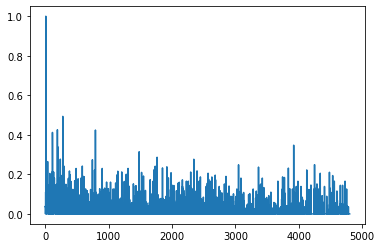

In [29]:
# Plotting the flattened scores to view them better
plt.plot(scores)

In [30]:
# Here sort the movies in descending order with the most similar movies at the 
# front. We use 'argsort' here to see which order the movies go in if we sorted
# by the scores. So which order of the movies render sorted scores in descending
# order
highest_scores_movies = (-scores).argsort()

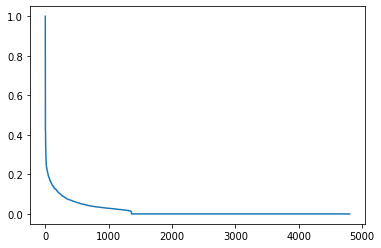

In [31]:
# Plotting the movies that render the highest similarity scores
plt.plot(scores[highest_scores_movies])

We see that most movies are unrelated to the 'query' (Scream3) movie.
A couple are related though

In [32]:
# Here we pick only the top 5 movies with the highest correlation with the 
# query (Scream 3) excluding the first movie (which is correlation itself!)
top5_recomnd_movies = highest_scores_movies[1:6]

In [33]:
# The above recommendations are just integers. Hence we are interested in the
# actual titles
data['title'].iloc[top5_recomnd_movies]

276       Harry Potter and the Chamber of Secrets
191      Harry Potter and the Prisoner of Azkaban
791                                    Goosebumps
113     Harry Potter and the Order of the Phoenix
3919                                Teen Wolf Too
Name: title, dtype: object

**Here we recreate the above steps into 1 function**


In [34]:
# Creating the recommend_movie function with the title as input variable. We 
# assume this title always exists in our database.
def recommend_movie(title):
    # Checking if title is of type Panda Series --> because it can give multiple
    # rows of the same data
    if type(title) == pd.Series:
        idx = idx.iloc[0]
    # Getting the index (row) of the given movie title
    idx = movie2idx[title]
    # Vieuwing a single row of the tfidf sparse matrix X
    query = X[idx]
    # Computing the cosine similarity between the query & every vector in X
    scores = cosine_similarity(query, X)
    # converting the 1xN array into 1-D array 
    scores = scores.flatten()
    # Here sort the movies in descending order with the most similar movies 
    # at the front. 
    highest_scores_movies = (-scores).argsort()
    # Here we pick only the top 5 movies with the highest correlation with the 
    # query (Scream 3) excluding the first movie (which is correlation itself!)
    top5_recomnd_movies = highest_scores_movies[1:6]
    # Converting the recommended indexes into actual movie titles

    return data['title'].iloc[top5_recomnd_movies]


In [35]:
# Our movie recommender live!!
recommend_movie('Quantum of Solace')


147                Die Another Day
2                          Spectre
29                         Skyfall
164                Lethal Weapon 4
2878    The Pursuit of D.B. Cooper
Name: title, dtype: object